In [1]:
import pandas as pd
import numpy as np

file_name = r"test.xlsx"
dtest = pd.read_excel(file_name)

name = r"train.xlsx"
dtrain = pd.read_excel(name)

In [2]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('sentence-transformers/sentence-t5-base')
dtest['EmbeddingsLM']=dtest['Equation'].apply(lambda x:model.encode(x))
t5_test=pd.DataFrame(dtest['EmbeddingsLM'].tolist(),index=dtest.index).add_prefix('embed_')

In [3]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('sentence-transformers/sentence-t5-base')
dtrain['EmbeddingsLM']=dtrain['input'].apply(lambda x:model.encode(str(x)))
t5_train=pd.DataFrame(dtrain['EmbeddingsLM'].tolist(),index=dtrain.index).add_prefix('embed_')

In [10]:
from sklearn.metrics import pairwise_distances
import numpy as np

class_0_embeddings = t5_train[dtrain['output'] == 1] 
class_1_embeddings = t5_train[dtrain['output'] == 1] 

# Calculate class centroids
class_0_centroid = np.mean(class_0_embeddings, axis=0)
class_1_centroid = np.mean(class_1_embeddings, axis=0)

# Calculate intra-class spread
intra_class_spread_0 = np.mean(pairwise_distances(class_0_embeddings, [class_0_centroid]))
intra_class_spread_1 = np.mean(pairwise_distances(class_1_embeddings, [class_1_centroid]))

# Calculate inter-class distance
inter_class_distance = np.linalg.norm(class_0_centroid - class_1_centroid)

print(f"Intra-Class Spread for Class 0: {intra_class_spread_1}")
print(f"Intra-Class Spread for Class 1: {intra_class_spread_1}")
print(f"Inter-Class Distance: {inter_class_distance}")

Intra-Class Spread for Class 0: 0.4119475483894348
Intra-Class Spread for Class 1: 0.4119475483894348
Inter-Class Distance: 0.0


In [8]:
import numpy as np
class_0_centroid = np.mean(class_0_embeddings, axis=0)
class_1_centroid = np.mean(class_1_embeddings, axis=0)

print("Centroid for Class 0:")
print(class_0_centroid)

print("Centroid for Class 1:")
print(class_1_centroid)

Centroid for Class 0:
embed_0     -0.035578
embed_1     -0.016204
embed_2      0.029941
embed_3      0.024514
embed_4     -0.014534
               ...   
embed_763    0.039044
embed_764    0.015638
embed_765    0.004035
embed_766   -0.015842
embed_767   -0.017141
Length: 768, dtype: float32
Centroid for Class 1:
embed_0     -0.035578
embed_1     -0.016204
embed_2      0.029941
embed_3      0.024514
embed_4     -0.014534
               ...   
embed_763    0.039044
embed_764    0.015638
embed_765    0.004035
embed_766   -0.015842
embed_767   -0.017141
Length: 768, dtype: float32


In [11]:

std_dev_class_0 = np.std(class_0_embeddings, axis=0)
std_dev_class_1 = np.std(class_1_embeddings, axis=0)

print("Standard Deviation for Class 0:")
print(std_dev_class_0)

print("Standard Deviation for Class 1:")
print(std_dev_class_1)

Standard Deviation for Class 0:
embed_0      0.022676
embed_1      0.016684
embed_2      0.015554
embed_3      0.015559
embed_4      0.011162
               ...   
embed_763    0.016016
embed_764    0.017017
embed_765    0.014623
embed_766    0.020864
embed_767    0.022057
Length: 768, dtype: float32
Standard Deviation for Class 1:
embed_0      0.022676
embed_1      0.016684
embed_2      0.015554
embed_3      0.015559
embed_4      0.011162
               ...   
embed_763    0.016016
embed_764    0.017017
embed_765    0.014623
embed_766    0.020864
embed_767    0.022057
Length: 768, dtype: float32


In [12]:

class_0_centroid = np.mean(class_0_embeddings, axis=0)
class_1_centroid = np.mean(class_1_embeddings, axis=0)

distance_between_classes = np.linalg.norm(class_0_centroid - class_1_centroid)

print("Distance between Class 0 and Class 1 mean vectors:")
print(distance_between_classes)

Distance between Class 0 and Class 1 mean vectors:
0.0


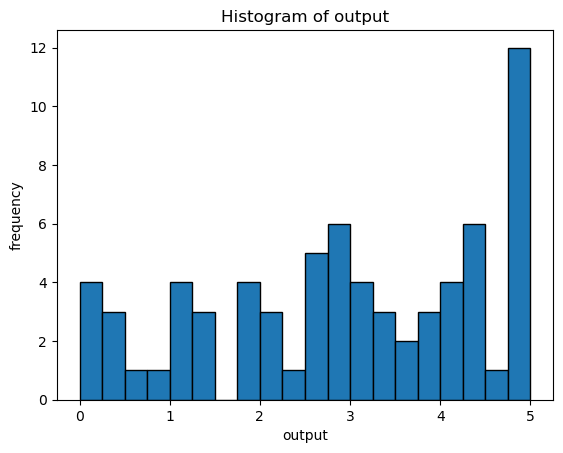

Mean of output: 2.8616844465058753
Variance of output: 2.402811788864269


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = r"test.xlsx"
df = pd.read_excel(file_name)

selected_feature = 'output'

plt.hist(df[selected_feature], bins=num_bins, edgecolor='k')
plt.xlabel(selected_feature)
plt.ylabel('frequency')
plt.title(f'Histogram of {selected_feature}')
plt.show()

# Calculate the mean and variance
feature_mean = df[selected_feature].mean()
feature_variance = df[selected_feature].var()

print(f"Mean of {selected_feature}: {feature_mean}")
print(f"Variance of {selected_feature}: {feature_variance}")

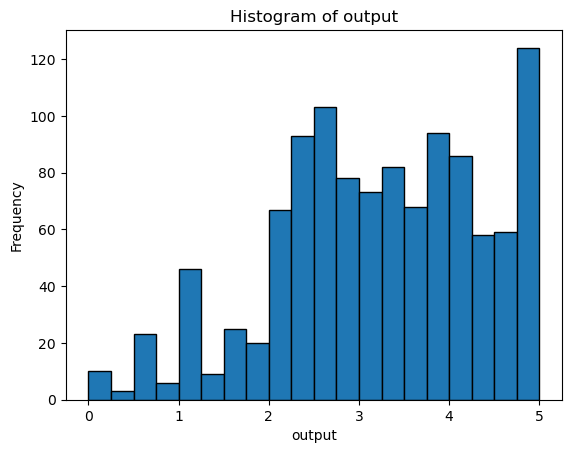

Mean of output: 3.13614526555964
Variance of output: 1.3751565931940488


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = r"train.xlsx"
df = pd.read_excel(name)

selected_feature = 'output'


num_bins = 20 
plt.hist(df[selected_feature], bins=num_bins, edgecolor='k')
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_feature}')
plt.show()

# Calculate the mean and variance
feature_mean = df[selected_feature].mean()
feature_variance = df[selected_feature].var()

print(f"Mean of {selected_feature}: {feature_mean}")
print(f"Variance of {selected_feature}: {feature_variance}")

C:\Users\91939\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\91939\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


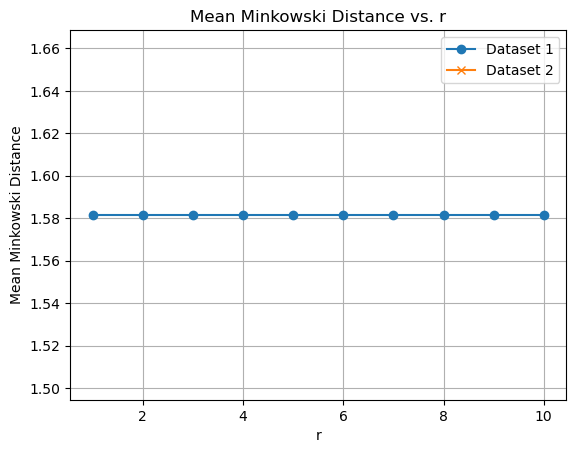

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = r"test.xlsx"
df1 = pd.read_excel(file_name)


file_name = r"train.xlsx"
df2 = pd.read_excel(name)


feature1 = df1['output'].values
feature2 = df2['output'].values

r_values = range(1, 11)

distances1 = []
distances2 = []

for r in r_values:
    minkowski_distances1 = []
    minkowski_distances2 = []
    
    for i in range(len(feature1)):
        for j in range(len(feature2)):
            distance = np.abs(feature1[i] - feature2[j])**r
            minkowski_distances1.append(distance**(1/r))
    
    mean_distance1 = np.mean(minkowski_distances1)
    mean_distance2 = np.mean(minkowski_distances2)
    
    distances1.append(mean_distance1)
    distances2.append(mean_distance2)

# Create a plot to observe the nature of the distance graph for both datasets
plt.plot(r_values, distances1, label='Dataset 1', marker='o', linestyle='-')
plt.plot(r_values, distances2, label='Dataset 2', marker='x', linestyle='-')
plt.xlabel('r')
plt.ylabel('Mean Minkowski Distance')
plt.title('Mean Minkowski Distance vs. r')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)

# Create a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to your training data
neigh.fit(X_train, y_train)

NameError: name 'X' is not defined